This dataset contains the usage statistics of various apps on a phone.

The dataset contains 5 columns:

- Date column represents the date of the data.
- Usage column represents the duration of app usage in minutes.
- Notifications column represents the count of notifications received from the app.
- Times Opened column represents the count of times the app was opened.
- App column represents the name of the app.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as gr

In [2]:
data = pd.read_csv("Screentime-App-Details.csv")   # Loading the dataset
print(data.head()) 

         Date  Usage  Notifications  Times opened        App
0  08/26/2022     38             70            49  Instagram
1  08/27/2022     39             43            48  Instagram
2  08/28/2022     64            231            55  Instagram
3  08/29/2022     14             35            23  Instagram
4  08/30/2022      3             19             5  Instagram


In [3]:
data.isnull().sum()    # Checking for any missing values


Date             0
Usage            0
Notifications    0
Times opened     0
App              0
dtype: int64

The dataset doesn’t have any null values



In [4]:
data.describe()   # Descriptive statistics of the dataset


,Usage,Notifications,Times opened
count,54.000000,54.000000,54.000000
mean,65.037037,117.703704,61.481481
std,58.317272,97.017530,43.836635
min,1.000000,8.000000,2.000000
25%,17.500000,25.750000,23.500000
50%,58.500000,99.000000,62.500000
75%,90.500000,188.250000,90.000000
max,244.000000,405.000000,192.000000


# checking the time of usage of the apps:


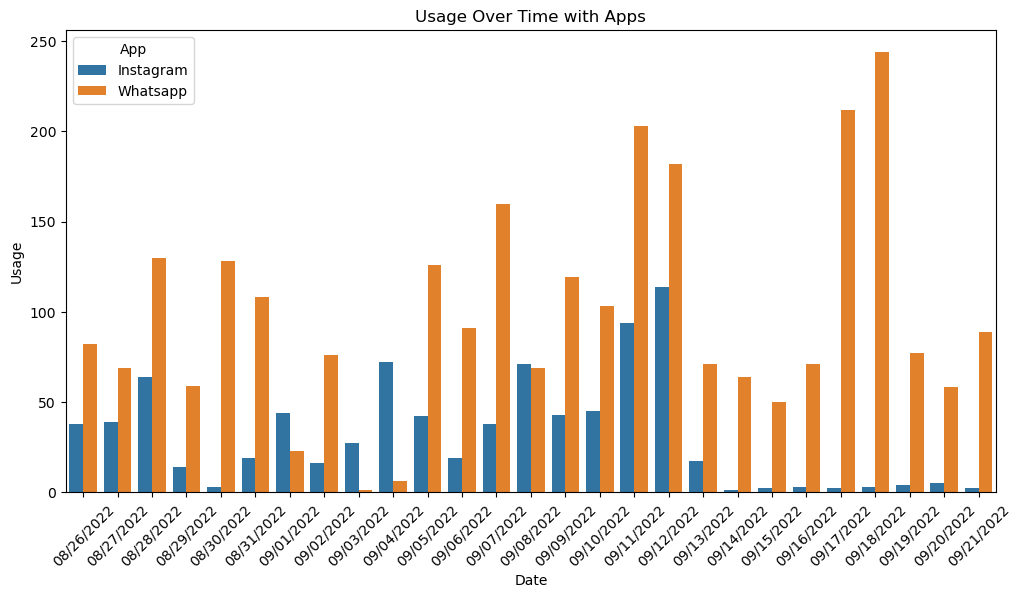

In [5]:
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x="Date", y="Usage", hue="App")
plt.title("Usage Over Time with Apps")
plt.xticks(rotation=45)
plt.show()

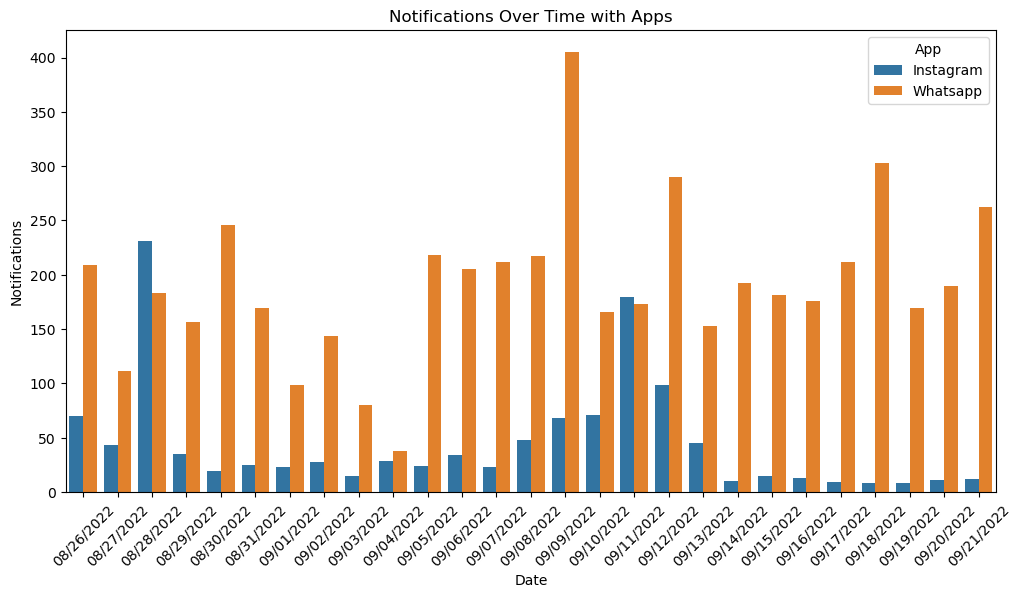

In [6]:
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x="Date", y="Notifications", hue="App")
plt.title("Notifications Over Time with Apps")
plt.xticks(rotation=45)
plt.show()


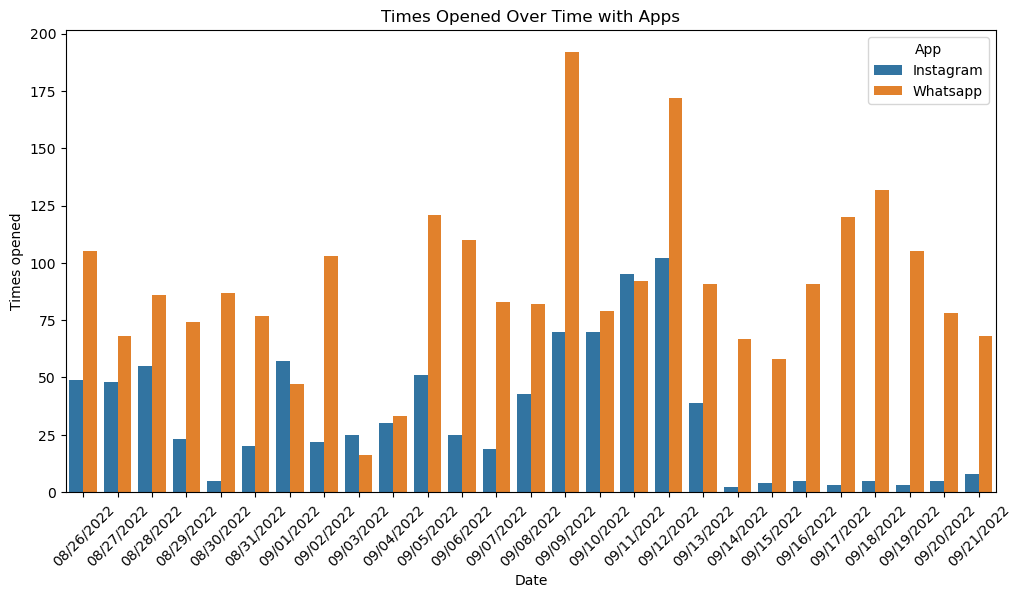

In [7]:
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x="Date", y="Times opened", hue="App")
plt.title("Times Opened Over Time with Apps")
plt.xticks(rotation=45)
plt.show()

# relations btw notif and usage it shud be as notif is high, usage should be high


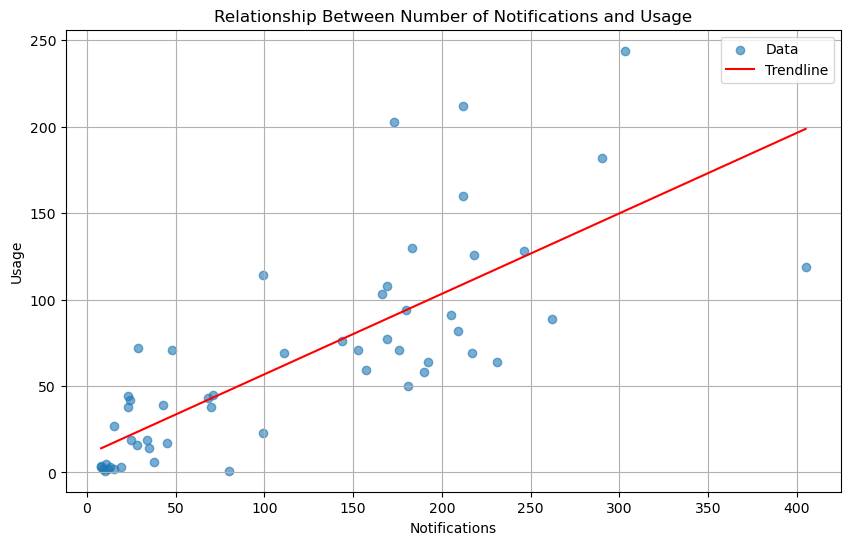

In [8]:

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data["Notifications"], data["Usage"], alpha=0.6, label='Data')

# Calculate the best-fit line
slope, intercept = np.polyfit(data["Notifications"], data["Usage"], 1)
x_values = np.array([min(data["Notifications"]), max(data["Notifications"])])
y_values = slope * x_values + intercept

# Plot the best-fit line
plt.plot(x_values, y_values, color='red', label='Trendline')

# Plot labels and title
plt.xlabel("Notifications")
plt.ylabel("Usage")
plt.title("Relationship Between Number of Notifications and Usage")
plt.grid(True)
plt.legend()
plt.show()


there is a linear relationship between the number of notifications and the amount of usage. It means that more notifications result in more use of smartphones.

# Machine Learning using Linear Regression

In [9]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [10]:
# App column is categorical, we convert it to numerical using one-hot encoding
data = pd.get_dummies(data, columns=['App'], drop_first=True)

In [11]:
# Splitting the data into feature (X) and target-variable (y)
X = data.drop(columns=['Usage', 'Date'])  # Features
y = data['Usage']  # Target variable

In [12]:
# Splitting dataset into training & testing sets 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Model Loading and training
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
# Model Eval
y_pred_train = model.predict(X_train)
train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
print("Training RMSE:", train_rmse)


Training RMSE: 32.410704975029894


In [15]:
y_pred_test = model.predict(X_test)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
print("Testing RMSE:", test_rmse)

Testing RMSE: 35.9699712374762


*Data Exploration:*

- The dataset contains usage statistics of various smartphone apps, including usage duration, notifications received, and number of times opened.
- EDA revealed the distribution and trends of app usage over time, relationships between different variables, and potential insights into user behavior.

*Data Preprocessing:*

- Checked for missing values (none found).
- Utilized one-hot encoding to convert categorical variable App into numerical format.

*Model Building:*

- Used linear regression for predicting app usage based on features like notifications and times opened.
- Split the dataset into training and testing sets (80% train, 20% test).
- Trained the model on the training data and evaluated its performance using Root Mean Squared Error (RMSE).

*Model Evaluation:*

- Achieved a training RMSE of approximately 32.41 and testing RMSE of around 35.97.
- The RMSE values suggest a reasonably balanced model performance, with consistent performance on both training and testing sets.

*Conclusion:*

- Found that linear regression model provides a reasonable baseline for predicting app usage.

